In [19]:
# 3D plot af aktier
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import preprocessing

def getStockQuotes(symbol:str, start:str=None, end:str=None) -> []:
    import yfinance as yf
    import pandas as pd
    return yf.download(symbol, start=start, end=end, progress=False)

def getStockQuotesFromList(symbols:[], column:str=None, start:str=None, end:str = None) -> []:
    result = []
    for symbol in symbols:
        if column is None:
            result.append(getStockQuotes(symbol, start, end))
        else:
            result.append(getStockQuotes(symbol, start, end)[column])
    
    return result 

def normalizeQuotes(quotes:[]) -> []:
    result = []
    for quote in quotes:
        result.append(preprocessing.normalize([quote]))
    
    return result

def prependZeros(lists:[]) -> []:
    # find antallet af længste samling        
    r = []
    count = 0
    for list in lists:
        if len(list) > count:
            count = len(list)
                
    for list in lists:        
        if len(list) < count:
            n = count - len(list)
            print("inserting zeros: ", n)
            list = np.concatenate((np.zeros(n), list))
            
  
        
        r.append(list)    
    return r

In [27]:
stock_codes = ['TSLA', 'PCRFY', 'VWAGY', '300750.SZ']
stock_quotes_in_list = getStockQuotesFromList(stock_codes, 'Close') #, '2021-01-01', '2021-04-30'
stock_quotes_in_list = prependZeros(stock_quotes_in_list)
stock_quotes_in_list = normalizeQuotes(stock_quotes_in_list)



modtog  4  lister
2745 <class 'pandas.core.series.Series'>
10386 <class 'pandas.core.series.Series'>
4630 <class 'pandas.core.series.Series'>
716 <class 'pandas.core.series.Series'>
inserting zeros:  7641
inserting zeros:  5756
inserting zeros:  9670


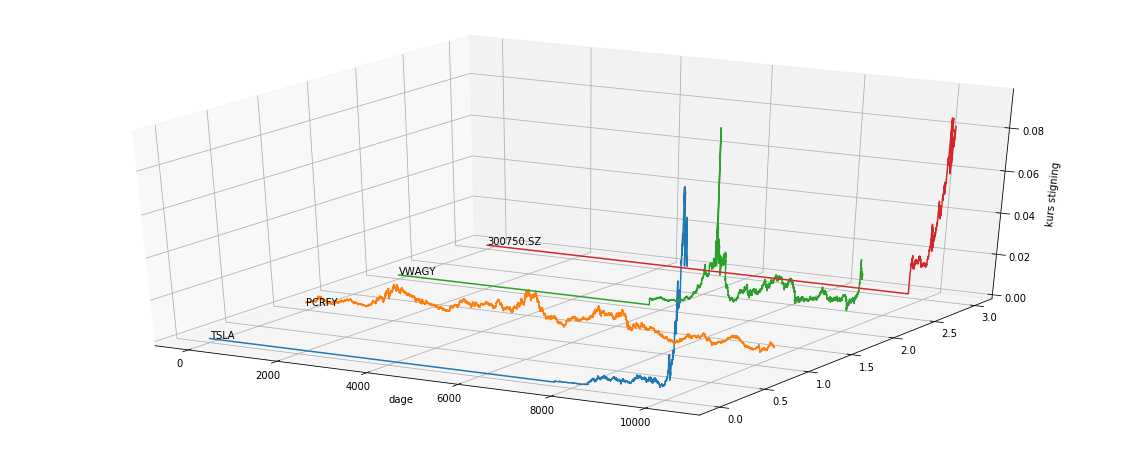

In [28]:
# 
fig = plt.figure(figsize=(20,8))

ax = plt.axes(projection='3d')

for idx, stock in enumerate(stock_quotes_in_list):
    stock = stock.flatten()
    line = ax.plot3D(np.arange(len(stock)),[idx for _ in stock], stock)    
    ax.text3D(0,idx, 0, stock_codes[idx])

ax.set_xlabel("dage")
ax.set_zlabel("kurs stigning")

plt.show()

"""
Vores 3D plot af Tesla og relaterede aktier viser, at der kan være en sammenhæng mellem stigning af aktier for Tesla og Tesla's batterileverandør. Det kunne tyde på at aktierne enten influerer hinanden eller påvirkes af de samme faktorer. På samme måde kan en svag stigning i VW aktien også ses på samme tid.
"""

In [22]:
# 
# import plotly.graph_objects as go
# import numpy as np
# np.random.seed(1)

# # N = 70

# # asfd = 70*np.random.randn(N)
# # print(type(asfd), asfd.shape, asfd)
# # fig = go.Figure(data=[go.Mesh3d(x=(70*np.random.randn(N)),
# #                    y=(55*np.random.randn(N)),
# #                    z=(40*np.random.randn(N)),
# #                    opacity=0.5,
# #                    color='rgba(244,22,100,0.6)'
# #                   )])

# #print(stock)
# figures = []
# for idx, stock in enumerate(zeroed):
#     print(len(stock), idx)
#     line = ax.plot3D(np.arange(len(stock)),[idx for _ in stock], stock)
#     ax.text3D(0,idx, 0, stock_codes[idx])
#     figures.append(go.Mesh3d(x=(np.arange(len(stock))),
#                    y=(stock),
#                    z=([idx for _ in stock]),
#                    opacity=0.5,
#                    color='rgba(244,22,100,0.6)'
#                    ))
# fig = go.Figure(data=figures)
#     # fig = go.Figure(data=[go.Mesh3d(x=([idx for _ in stock]),
#     #                y=(np.arange(len(stock))),
#     #                z=(stock),
#     #                opacity=0.5,
#     #                color='rgba(244,22,100,0.6)'
#     #                ),go.Mesh3d(x=(np.arange(len(stock))),
#     #                y=(stock),
#     #                z=([2 for _ in stock]),
#     #                opacity=0.5,
#     #                color='rgba(244,22,100,0.6)'
#     #                )])

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=len(stock), range=[0,len(stock)],),
#                      yaxis = dict(nticks=100, range=[0,1],),
#                      zaxis = dict(nticks=4, range=[0,5],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

# fig.show()